In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [16]:
import numpy as np
import pandas as pd

Extract the Data

In [17]:
df=pd.read_csv("vehicles.csv")
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [18]:
df.head().T

,0,1,2,3,4
id,7222695916,7218891961,7221797935,7222270760,7210384030
url,https://prescott.craigslist.org/cto/d/prescott...,https://fayar.craigslist.org/ctd/d/bentonville...,https://keys.craigslist.org/cto/d/summerland-k...,https://worcester.craigslist.org/cto/d/west-br...,https://greensboro.craigslist.org/cto/d/trinit...
region,prescott,fayetteville,florida keys,worcester / central MA,greensboro
region_url,https://prescott.craigslist.org,https://fayar.craigslist.org,https://keys.craigslist.org,https://worcester.craigslist.org,https://greensboro.craigslist.org
price,6000,11900,21000,1500,4900
year,NaN,NaN,NaN,NaN,NaN
manufacturer,NaN,NaN,NaN,NaN,NaN
model,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN
cylinders,NaN,NaN,NaN,NaN,NaN


Data Cleaning

In [19]:
df.shape

(426880, 26)

In [20]:
missing=df.isna().sum()
missing

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [21]:
df.duplicated().sum()

0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [23]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [24]:
df.describe(include='object').T

,count,unique,top,freq
url,426880,426880,https://prescott.craigslist.org/cto/d/prescott...,1
region,426880,404,columbus,3608
region_url,426880,413,https://spokane.craigslist.org,2988
manufacturer,409234,42,ford,70985
model,421603,29667,f-150,8009
condition,252776,6,good,121456
cylinders,249202,8,6 cylinders,94169
fuel,423867,5,gas,356209
title_status,418638,6,clean,405117
transmission,424324,3,automatic,336524


In [25]:
df.drop(columns="county", inplace=True)

In [26]:
df.drop(columns=["url", "region_url", "image_url"], inplace=True)

In [27]:
df["year"]=pd.to_numeric(df["year"])
df["odometer"]=pd.to_numeric(df["odometer"])

In [28]:
df.interpolate(method="linear",limit_direction="both").head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_10460\527803060.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method="linear",limit_direction="both").head()


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
0,7222695916,prescott,6000,2014.0,NaN,NaN,NaN,NaN,NaN,57923.0,...,NaN,NaN,NaN,NaN,NaN,NaN,az,32.59,-85.48,NaN
1,7218891961,fayetteville,11900,2014.0,NaN,NaN,NaN,NaN,NaN,57923.0,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,32.59,-85.48,NaN
2,7221797935,florida keys,21000,2014.0,NaN,NaN,NaN,NaN,NaN,57923.0,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,32.59,-85.48,NaN
3,7222270760,worcester / central MA,1500,2014.0,NaN,NaN,NaN,NaN,NaN,57923.0,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,32.59,-85.48,NaN
4,7210384030,greensboro,4900,2014.0,NaN,NaN,NaN,NaN,NaN,57923.0,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,32.59,-85.48,NaN


In [29]:
#remove outliers from lat and longitude 
lat1=df.lat.quantile(0.25)
lat3=df.lat.quantile(0.75)
iqr=lat3-lat1
iqr

7.796999999999997

In [30]:
low=lat1+(1.5*iqr)
high=lat3+(1.5*iqr)
df[(df["lat"]>low)&(df["lat"]<high)].head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
5013,7316600112,anchorage / mat-su,11950,2001.0,gmc,sierra 2500hd,excellent,8 cylinders,gas,128168.0,...,1GTHK24U51E246567,4wd,full-size,truck,white,2001 GMC SIERRA 2500HD REG CAB LONG BOX 4X4 6....,ak,47.26650,-122.03140,2021-05-03T21:05:10-0800
5426,7315067602,anchorage / mat-su,15000,1972.0,chevrolet,el camino,good,8 cylinders,gas,80000.0,...,1080J2L576491,rwd,full-size,truck,white,1972 Chevrolet El Camino SS custom 350 origina...,ak,47.41790,-122.63100,2021-04-30T14:32:21-0800
5528,7314627440,anchorage / mat-su,22950,2002.0,ford,f250 crew cab 4x4,excellent,8 cylinders,diesel,209121.0,...,1FTNW21F52ED35456,4wd,NaN,truck,blue,2002 FORD F250 LARIAT CREW CAB SHORT BOX 4X4 7...,ak,47.26650,-122.03140,2021-04-29T16:59:15-0800
6124,7311627416,anchorage / mat-su,64999,2018.0,ram,3500,NaN,6 cylinders,diesel,77424.0,...,3C63R3JL1JG423705,4wd,NaN,truck,NaN,WE DO SHIPPING TO ALASKAASK US HOW 855-576-085...,ak,47.81247,-122.32164,2021-04-23T14:51:52-0800
6125,7311626491,anchorage / mat-su,18999,2004.0,ford,super duty f-350 srw,NaN,8 cylinders,diesel,142128.0,...,1FTSW31P24EA97974,4wd,NaN,truck,NaN,WE DO SHIPPING TO ALASKAASK US HOW 855-576-085...,ak,47.81247,-122.32164,2021-04-23T14:49:46-0800


In [31]:
#remove extreme values in price
mn=df[df["price"]<10].index
mx=df[df["price"]>1000000].index
df.drop(index=mx, axis=0, errors="ignore", inplace=True)
df.drop(index=mn, axis=0, errors="ignore", inplace=True)

In [32]:
#remove outliers from price
q1=df["price"].quantile(0.25)
q3=df["price"].quantile(0.75)
IQR=q3-q1
lower=q1-(1.5*IQR)
upper=q3+(1.5*IQR)
lowIdx=df[df["price"]<lower].index
highIdx=df[df["price"]>upper].index
df.drop(index=lowIdx, axis=0, errors="ignore", inplace=True)
df.drop(index=highIdx, axis=0, errors="ignore", inplace=True)

In [33]:
#remove extreme values from odometer
lowOdo=df[(df["odometer"]<500)&(df["condition"]!="new")].index
highOdo=df[(df["odometer"]>300000)].index
df.drop(index=lowOdo, axis=0, errors="ignore", inplace=True)
df.drop(index=highOdo, axis=0, errors="ignore", inplace=True)

In [34]:
#remove outliers from odometer
Q1=df["odometer"].quantile(0.25)
Q3=df["odometer"].quantile(0.75)
IqR=Q3-Q1
Lower=Q1-(1.5*IqR)
Upper=Q3+(1.5*IqR)
LowIdx=df[df["odometer"]<Lower].index
HighIdx=df[df["odometer"]>Upper].index
df.drop(index=LowIdx, axis=0, errors="ignore", inplace=True)
df.drop(index=HighIdx, axis=0, errors="ignore", inplace=True)

In [35]:
#remove extreme vlues from year
low_year = df[df["year"] < 1908].index
high_year = df[df["year"] > 2021].index
df.drop(index=low_year, axis=0, errors="ignore", inplace=True)
df.drop(index=high_year, axis=0, errors="ignore", inplace=True)

In [36]:
df.dropna(inplace=True)

In [37]:
df.isna().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
description     0
state           0
lat             0
long            0
posting_date    0
dtype: int64

In [38]:
df.corr(numeric_only=True)

,id,price,year,odometer,lat,long
id,1.000000,-0.090538,-0.067287,0.048513,-0.076106,-0.167616
price,-0.090538,1.000000,0.381879,-0.439857,0.025830,0.018833
year,-0.067287,0.381879,1.000000,-0.305208,0.007694,0.005022
odometer,0.048513,-0.439857,-0.305208,1.000000,-0.026640,0.006896
lat,-0.076106,0.025830,0.007694,-0.026640,1.000000,-0.094501
long,-0.167616,0.018833,0.005022,0.006896,-0.094501,1.000000


EDA

In [42]:
pip install Matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [43]:
import matplotlib as mpl

In [44]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'description', 'state', 'lat',
       'long', 'posting_date'],
      dtype='object')

What is the most popular color?

In [45]:
df["paint_color"].value_counts()

paint_color
white     8591
black     5694
silver    4277
grey      3815
blue      3025
red       2800
custom     843
green      822
brown      738
yellow     205
orange     144
purple      72
Name: count, dtype: int64

When were purple vehicles most produced?

In [57]:
pp=df[(df["paint_color"]=="purple")]
purpleYear=pp["year"].value_counts()
purpleYear

year
2010.0    6
2007.0    6
2003.0    5
2005.0    5
1952.0    5
2011.0    4
2000.0    4
2013.0    4
2017.0    4
2012.0    3
2014.0    3
2009.0    3
1992.0    3
1980.0    2
1995.0    2
2008.0    2
2006.0    2
2001.0    2
1996.0    1
2019.0    1
2015.0    1
2016.0    1
2004.0    1
1997.0    1
1957.0    1
Name: count, dtype: int64

How many white vehicles did Chevrolet produce in 2019?

In [66]:
chv=df[(df["manufacturer"]=="chevrolet")&(df["paint_color"]=="white")&(df["year"]==2019)]
cnt=len(chv)
cnt

52

What is the most popular size?

<Axes: ylabel='count'>

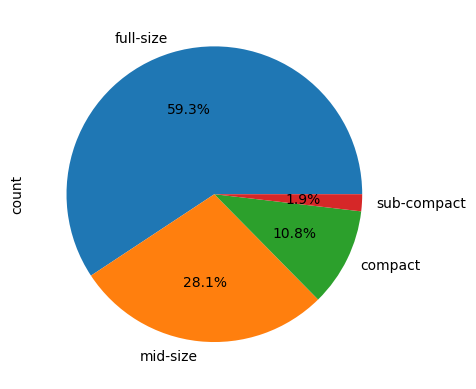

In [72]:
df["size"].value_counts().plot(kind="pie",autopct='%1.1f%%')

Who are the Top 5 manufacturer of vehicles?

In [80]:
import matplotlib.pyplot as plt

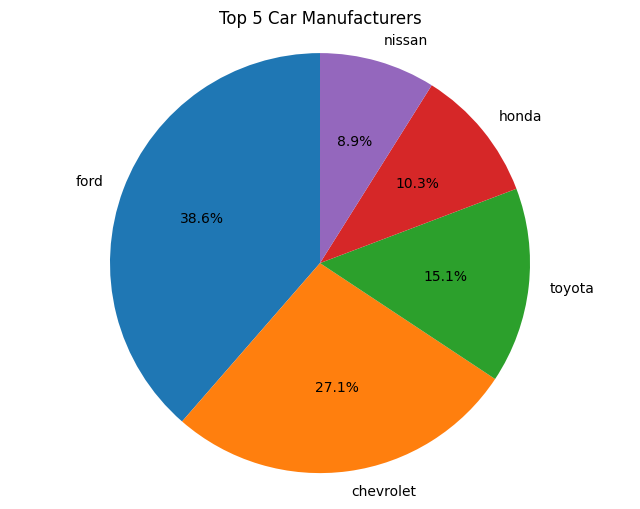

In [87]:
top=df["manufacturer"].value_counts().nlargest(5)
plt.figure(figsize=(8, 6))
plt.pie(top, labels=top.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Car Manufacturers")
plt.axis('equal')  
plt.show()

What is the most popular type of vehicles in 2019?

In [96]:
best=df[(df["year"]==2019)]
best["type"].value_counts()

type
van            248
SUV            232
truck          199
sedan          143
pickup          66
hatchback       22
mini-van        13
wagon           11
coupe            7
convertible      7
other            7
Name: count, dtype: int64

How many vehicles that have the least cylinders with Excellent condition?

In [97]:
df["condition"].value_counts()

condition
excellent    17181
good          9549
like new      3646
fair           468
new            148
salvage         34
Name: count, dtype: int64

In [98]:
df["cylinders"].value_counts()

cylinders
4 cylinders     10504
6 cylinders     10335
8 cylinders      9433
10 cylinders      328
5 cylinders       267
other              88
3 cylinders        60
12 cylinders       11
Name: count, dtype: int64

In [102]:
joe=df[(df["condition"]=="excellent")&(df["cylinders"]=="3 cylinders")]
len(joe)

28

Is there any Orange vehicles in auburn?

In [103]:
org=df[(df["region"]=='auburn')&(df["paint_color"]=="orange")]
len(org)

0

Thanks :)